In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# Adjusting size of the plots 
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv(r'C:\Users\arsul\OneDrive\Desktop\DA Portfolio\Python Correlations\movies.csv')

In [3]:
# Checking out the Data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Checking for missing data in dataset

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing, 1)))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.3%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
# Getting rid of missing data

df = df.dropna()

In [8]:
# Understanding Data types in dataset

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Changing 'budget' and 'gross' data type from float to int

df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
# Adding a column that extracts year number from 'released'

delimiter = ","
delimiter1 = "("
substring_list = df['released'].str.split(delimiter)
df['correctYear'] = substring_list[0][1]

substring_list1 = df['correctYear'].str.split(delimiter1)
df['correctYear'] = substring_list1[1][0]


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [11]:
# Changing the 'released' column so it only shows date and removes country released in

delimiter = "("
substring_list = df['released'].str.split(delimiter)
df['released'] = substring_list[0][0]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"June 13, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 13, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"June 13, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"June 13, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
# Sorting Data by Highest gross value, Movies that made the most money

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [13]:
pd.set_option('display.max_rows', 20)

In [14]:
# Getting rid of duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

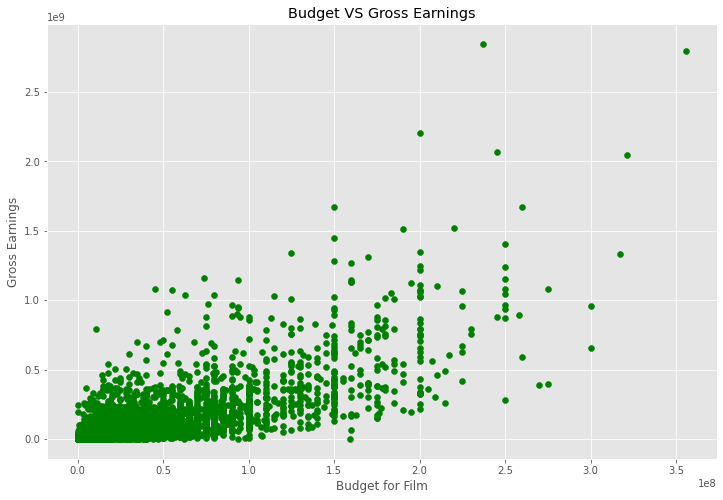

In [15]:
# Scatter plot of 'budget' against 'gross'

plt.scatter(x=df['budget'], y=df['gross'], color = 'green')

plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

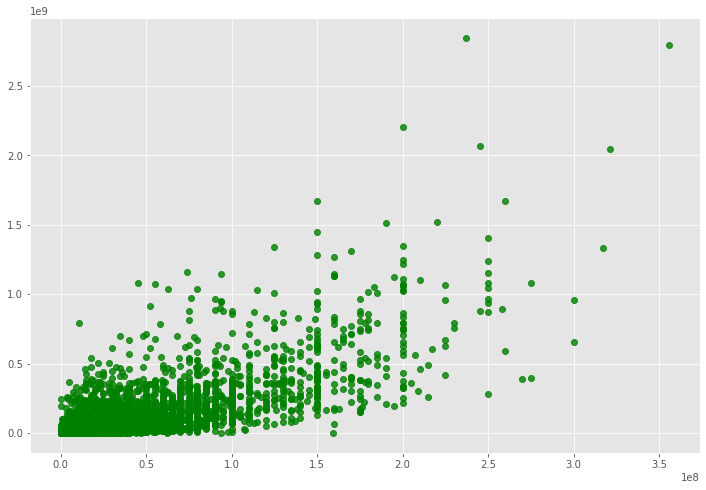

In [16]:
# Plotting 'budget' vs 'gross' using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color": "purple"})

In [17]:
# Looking in correlations (pearson, kendall, spearman)

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [18]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [19]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


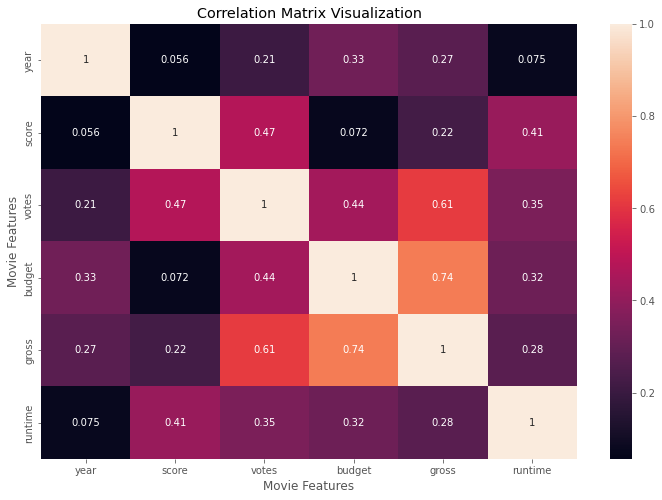

In [20]:
# 'budget' & 'gross' have a high correlation (value closest to 1)
# Visualizing correlation matrix

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Visualization')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [21]:
# Looking into a non-numeric columns and converting them into random numbers for further analysis

df_numbered = df

for col in df_numbered.columns:
    if(df_numbered[col].dtype == 'object'):
        df_numbered[col] = df_numbered[col].astype('category')
        df_numbered[col] = df_numbered[col].cat.codes
        
df_numbered.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
5445,386,5,0,2009,0,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,0
7445,388,5,0,2019,0,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,0
3045,4909,5,6,1997,0,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,0
6663,3643,5,0,2015,0,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,0
7244,389,5,0,2018,0,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,0


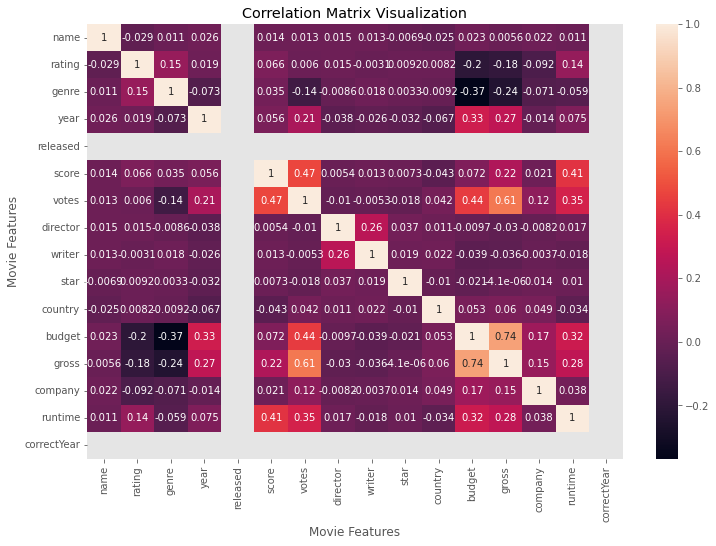

In [22]:
correlation_matrix = df_numbered.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Visualization')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [23]:
df_numbered.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
name,1.000000,-0.029234,0.010996,0.025542,NaN,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,NaN
rating,-0.029234,1.000000,0.147796,0.019499,NaN,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,NaN
genre,0.010996,0.147796,1.000000,-0.073167,NaN,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,NaN
year,0.025542,0.019499,-0.073167,1.000000,NaN,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,NaN
released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,0.014450,0.065983,0.035106,0.056386,NaN,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,NaN
votes,0.012615,0.006031,-0.135990,0.206021,NaN,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,NaN
director,0.015246,0.014656,-0.008553,-0.038354,NaN,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,NaN
writer,0.012880,-0.003149,0.017578,-0.025908,NaN,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,NaN
star,-0.006882,0.009196,0.003341,-0.032157,NaN,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,NaN


In [24]:
# Understanding Correlational pairs

correlation_mat = df_numbered.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released            NaN
                              ...   
correctYear  budget              NaN
             gross               NaN
             company             NaN
             runtime             NaN
             correctYear         NaN
Length: 256, dtype: float64

In [25]:
# Sorted Pairs and their correlational values

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
budget       rating        -0.203946
                              ...   
correctYear  budget              NaN
             gross               NaN
             company             NaN
             runtime             NaN
             correctYear         NaN
Length: 256, dtype: float64

In [26]:
# Sorted pairs with a correlational value of > 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [27]:
# This concludes that 'votes' and 'budget' have the highest correlation to 'gross' earnings of a movie

In [28]:
# Portfolio Project by Arsalmshams 